In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [186]:
from google.colab import files
files.upload()

MessageError: CustomError: Timed out waiting for output iframe load.

In [ ]:
import thinkdsp
wave=thinkdsp.read_wave("842175__caroliney__beethoven_broken_piano_trimmed.wav")
wave.make_audio()

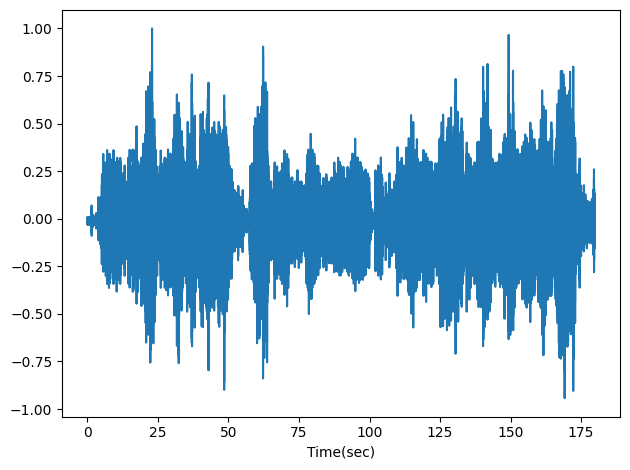

In [ ]:
from thinkdsp import decorate
wave.plot()
decorate(xlabel="Time(sec)")


The segment includes the wav(audion file) from 0.5 second to 1 second

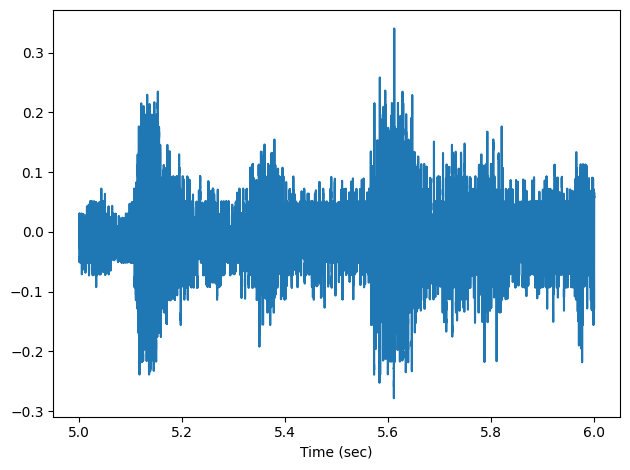

In [ ]:

start=5
duration=1
segment=wave.segment(start,duration)
segment.plot()
decorate(xlabel="Time (sec)")


making the spectrum for the segment

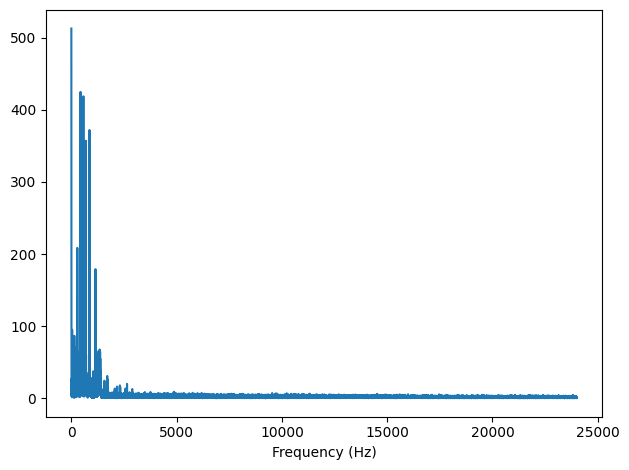

In [ ]:
spectrum=segment.make_spectrum()
spectrum.plot()
decorate(xlabel="Frequency (Hz)")

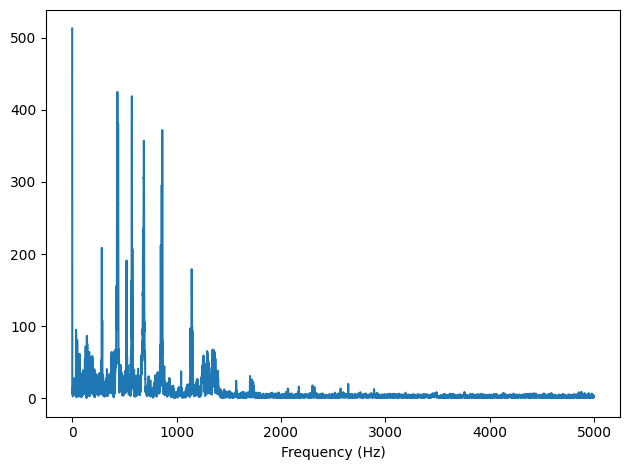

In [ ]:

spectrum.plot(high=5000)
decorate(xlabel="Frequency (Hz)")

Low pass filtered spectrum

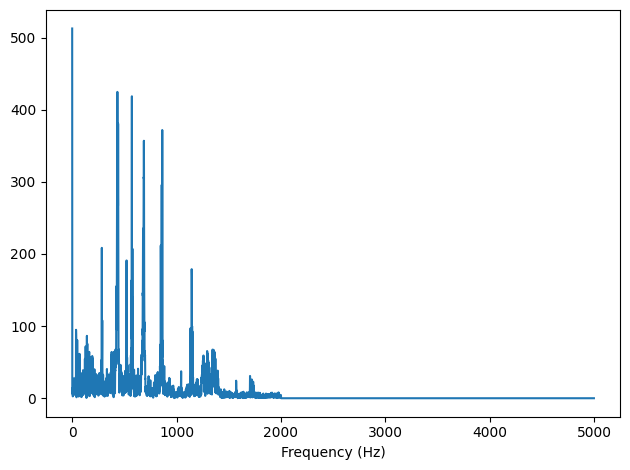

In [ ]:
spectrum.low_pass(2000)
spectrum.plot(high=5000)
decorate(xlabel="Frequency (Hz)")


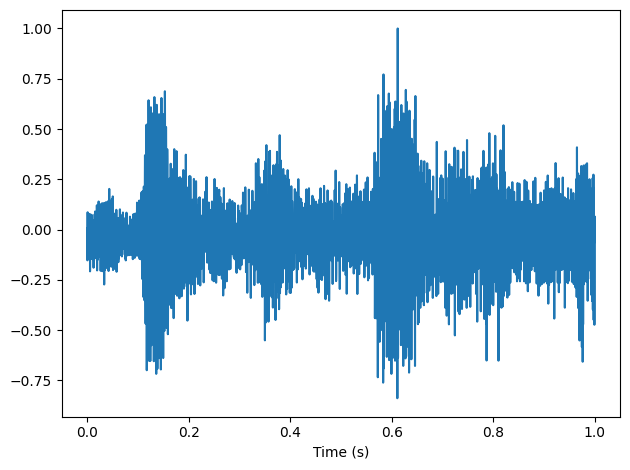

In [ ]:
low_filtered=spectrum.make_wave()
low_filtered.normalize()

low_filtered.plot()
decorate(xlabel="Time (s)")


In [ ]:
low_filtered.apodize()
low_filtered.make_audio()


In [ ]:
segment.make_audio()

High pass filtered

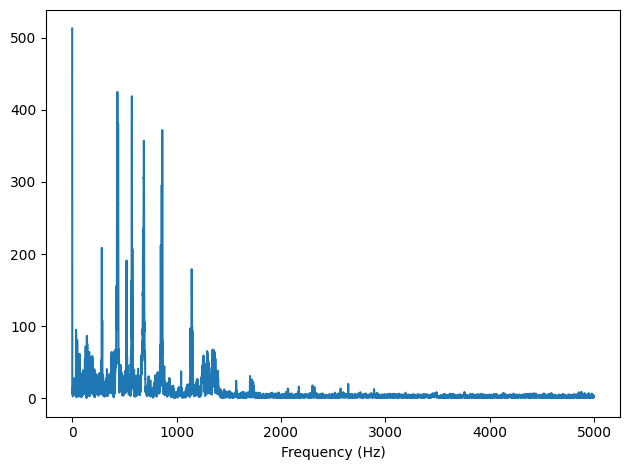

In [ ]:
spectrum2=segment.make_spectrum()
spectrum2.plot(high=5000)
decorate(xlabel="Frequency (Hz)")

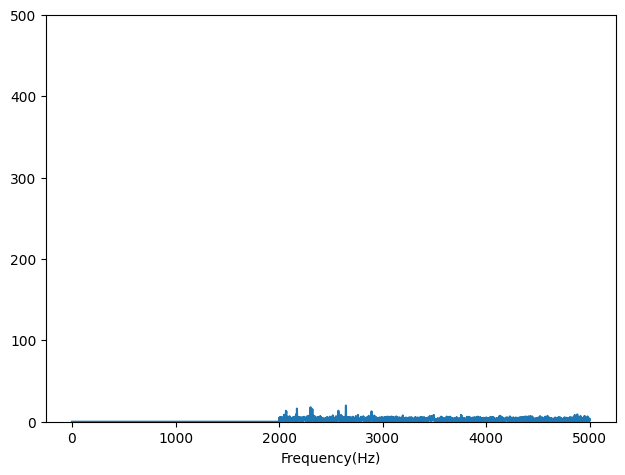

In [ ]:
import matplotlib.pyplot as plt

spectrum2.high_pass(2000)
spectrum2.plot(high=5000)
decorate(xlabel="Frequency(Hz)")
plt.ylim(0,500)
plt.show()


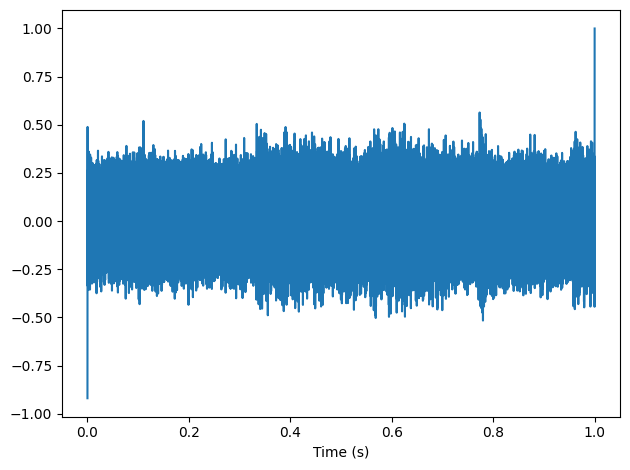

In [ ]:
high_filtered=spectrum2.make_wave()
high_filtered.normalize()
high_filtered.plot()
decorate(xlabel="Time (s)")


In [ ]:
high_filtered.apodize()
high_filtered.make_audio()

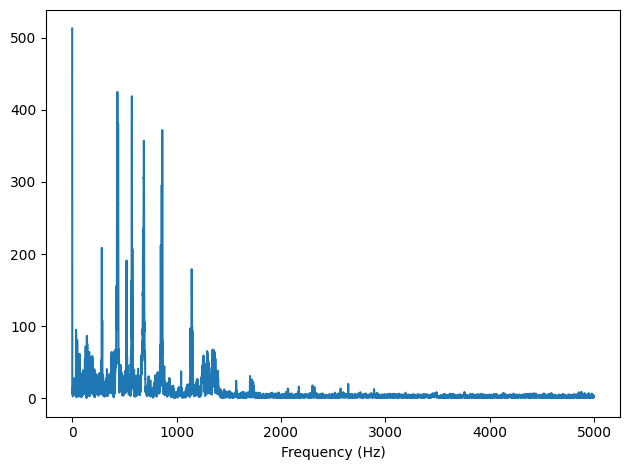

In [ ]:
spectrum3=segment.make_spectrum()
spectrum3.plot(high=5000)
decorate(xlabel="Frequency (Hz)")


Bandstop filtered wave

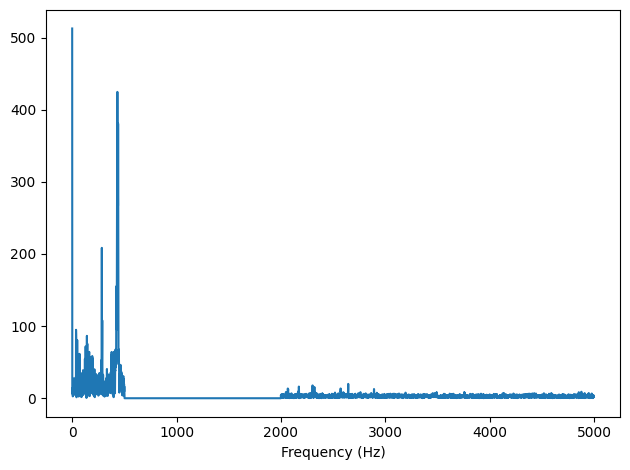

In [ ]:
spectrum3.band_stop(500,2000)
spectrum3.plot(high=5000)
decorate(xlabel="Frequency (Hz)")

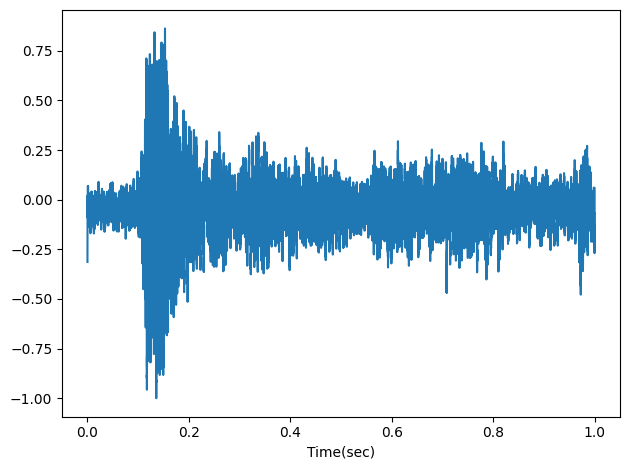

In [ ]:
bandstop_filtered=spectrum3.make_wave()
bandstop_filtered.normalize()
bandstop_filtered.plot()
decorate(xlabel="Time(sec)")

In [ ]:
bandstop_filtered.apodize()
bandstop_filtered.make_audio()

In [ ]:
low_filtered.make_audio()

In [ ]:
high_filtered.make_audio()

In [ ]:
segment.make_audio()


Differences that I have noted


*   the low pass filtered signal has only low frequency components where high frequency components including high frequency noise that was present in the original audio segment was removed, resulting in the audio to be more clear
*   the high pass filtered signal has only high frequency components (above 2KHz), making the audio to be almost full of noise and squiggly
*   the bandstop filtered signal has frequency components that are greater than 2000Hz and less than 500Hz, so the audio starts good and clear but turns into the squiggly sound just after a while (because the frequency components between 500 and 2000 Hz are removed the only left frequency components are those greater than 2000Hz, which are mostly squiggly sounds/audios)


